<a href="https://colab.research.google.com/github/Zain-Haider-ML/Chest-Cancer-Classification-End-to-End-using-MLflow-DVC/blob/main/%F0%9F%94%B9_XAI_Airline_Delays_Trends%2C_Causes_%26_Predictions_%E2%9C%88%EF%B8%8F%F0%9F%9A%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Airline Delays Analysis (AA 2023)

This notebook analyzes airline delays based on the dataset `aa-delays-2023.csv`. It includes data preprocessing, exploratory data analysis (EDA), feature engineering, and predictive modeling.

## **Sections:**
1. **Data Loading & Cleaning** - Handling missing values and inspecting dataset.
2. **Exploratory Data Analysis (EDA)** - Visualizing patterns and correlations.
3. **Feature Engineering** - Creating meaningful features for better insights.
4. **Machine Learning Modeling** - Predicting delays with improved ML techniques.

---


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [68]:
ds = pd.read_csv('/content/aa-delays-2023.csv')
ds.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,NaN


In [69]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              2836 non-null   object 
 1   OP_CARRIER           2836 non-null   object 
 2   OP_CARRIER_FL_NUM    2836 non-null   int64  
 3   ORIGIN               2836 non-null   object 
 4   DEST                 2836 non-null   object 
 5   CRS_DEP_TIME         2836 non-null   int64  
 6   DEP_TIME             2836 non-null   float64
 7   DEP_DELAY            2836 non-null   float64
 8   TAXI_OUT             2836 non-null   float64
 9   WHEELS_OFF           2836 non-null   float64
 10  WHEELS_ON            2836 non-null   float64
 11  TAXI_IN              2836 non-null   float64
 12  CRS_ARR_TIME         2836 non-null   int64  
 13  ARR_TIME             2836 non-null   float64
 14  ARR_DELAY            2836 non-null   float64
 15  CANCELLED            2836 non-null   f

In [70]:
ds.loc[:7, ['DEST', "ORIGIN"]]

,DEST,ORIGIN
0,DEN,EWR
1,SFO,LAS
2,DEN,SNA
3,ORD,RSW
4,ALB,ORD
5,OMA,ORD
6,LAS,IAH
7,CID,DEN


Whether arrival or destination is a hub

Hub : the connectivity of an airport to the other airports

In [71]:
# list of hubs
hubs = ['CLT','ORD','DFW','LAX','MIA','JFK','LGA','PHL','PHX','DCA']

is_origin_hub = ds['ORIGIN'].isin(hubs)
print("is_origin_hub\n",is_origin_hub)
is_dest_hub = ds['DEST'].isin(hubs)
print("is_dest_hub\n",is_dest_hub)

is_origin_hub
 0       False
1       False
2       False
3       False
4        True
        ...  
2831    False
2832    False
2833     True
2834    False
2835    False
Name: ORIGIN, Length: 2836, dtype: bool
is_dest_hub
 0       False
1       False
2       False
3        True
4       False
        ...  
2831    False
2832    False
2833    False
2834    False
2835    False
Name: DEST, Length: 2836, dtype: bool


Get and save hubs (not import which airport, only hubs)

In [72]:
# set Hubs
ds['ORIGIN_HUB'] = 0
ds.loc[is_origin_hub, 'ORIGIN_HUB'] = 1
ds['DEST_HUB'] = 0
ds.loc[is_dest_hub, 'DEST_HUB'] = 1

In [73]:
print('Delay target features\n', ds.loc[ds['ARR_DELAY'] > 15, ['ARR_DELAY', 'DEP_DELAY']].head(10))

Delay target features
     ARR_DELAY  DEP_DELAY
11      129.0      121.0
14       73.0       76.0
15       55.0       54.0
16       25.0       72.0
17       29.0       47.0
27       27.0       48.0
56       26.0       41.0
61       75.0       94.0
63      124.0      134.0
66      291.0      299.0




*   no responsibility: #14,#56,#61,#66
* partially responsibility: #16,#63
* almost full or full resposibility: #11,#15,#17,#27




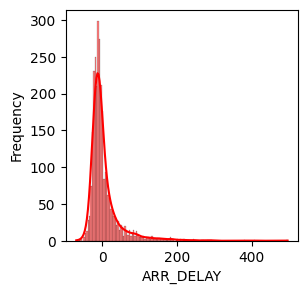

In [74]:
plt.figure(figsize=(3, 3))
sns.histplot(ds['ARR_DELAY'], kde=True, color='red')
plt.xlabel('ARR_DELAY')
plt.ylabel('Frequency')
plt.show()

In [75]:
from scipy import stats

NormResults = stats.kstest(ds['ARR_DELAY'][:100], stats.norm.cdf)
print('NormResults\n', NormResults)

NormResults
 KstestResult(statistic=0.6872498680518208, pvalue=1.5463486094080722e-47, statistic_location=-2.0, statistic_sign=1)


Since the p-value is greater than 0.05, the test suggests that the sample likely follow a normal distribution which you can see in the above visulaization as well.

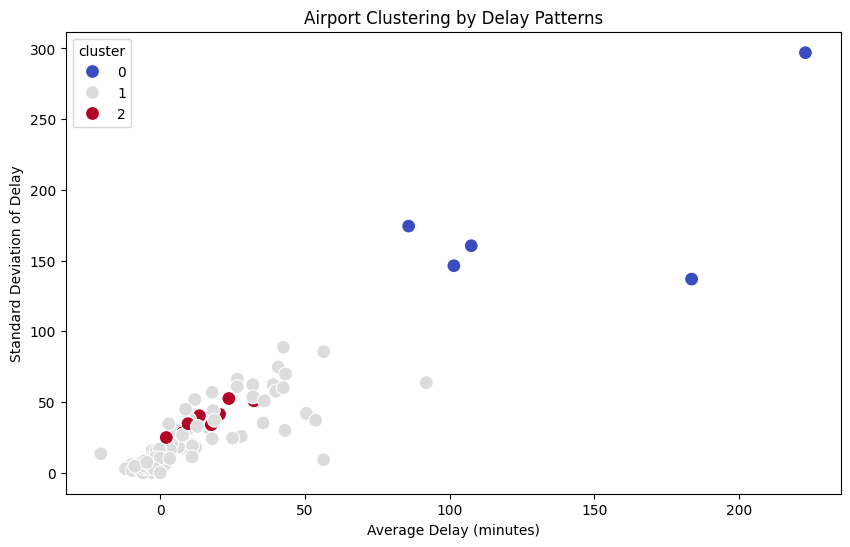

In [76]:
# Selecting features for clustering
clustering_features = ds.groupby('ORIGIN').agg({'DEP_DELAY': ['mean', 'std', 'count']}).dropna()
clustering_features.columns = ['mean_delay', 'std_delay', 'flight_count']

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_features['cluster'] = kmeans.fit_predict(clustering_features)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_features['mean_delay'], y=clustering_features['std_delay'], hue=clustering_features['cluster'], palette="coolwarm", s=100)
plt.title("Airport Clustering by Delay Patterns")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Standard Deviation of Delay")
plt.show()

In [77]:
x = ds.copy()

In [78]:
# deleting string variables and the superordinated features

x = x.drop(['ARR_DELAY','OP_CARRIER_FL_NUM','FL_DATE',
'ORIGIN','DEST','CANCELLATION_CODE','Unnamed: 27',
'CANCELLED','OP_CARRIER',
'DIVERTED'], axis=1)

Why I deleted the ARR_DELAY feature?

ARR_DELAY is **Super-ordinated** feature (Super-ordinated are the features that include or are derived from the target variable, making them unsuitable for training because they contain future information or direct answers. If included as a feature, it leaks the information about the target variable directly into the model. This leads to a data leakage problem, where the model unfairly learns from data it wouldn't have access to during real-world predictions.)

In [79]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRS_DEP_TIME,2836.0,1351.539845,512.584993,25.0,915.00,1335.0,1755.00,2359.0
DEP_TIME,2836.0,1360.573343,526.264852,0.0,926.00,1344.5,1805.25,2359.0
DEP_DELAY,2836.0,13.105430,40.953268,-30.0,-5.00,-1.0,12.00,509.0
TAXI_OUT,2836.0,18.693935,9.815194,0.0,13.00,16.0,22.00,112.0
WHEELS_OFF,2836.0,1375.275740,531.120962,0.0,938.00,1357.0,1815.25,2359.0
WHEELS_ON,2836.0,1444.713329,578.654752,0.0,1040.75,1508.0,1928.00,2400.0
TAXI_IN,2836.0,7.903032,6.381364,0.0,4.00,6.0,9.00,92.0
CRS_ARR_TIME,2836.0,1473.804654,562.470462,1.0,1056.00,1516.0,1940.00,2359.0
ARR_TIME,2836.0,1446.156559,584.064112,0.0,1044.75,1508.0,1931.25,2400.0
CRS_ELAPSED_TIME,2836.0,187.102609,92.688542,23.0,116.00,166.0,243.00,680.0



Correlation between features : Examine how linear correlated are the features to the target

In [80]:
corr = x.corr()
print(abs(corr['CARRIER_DELAY'].sort_values(ascending=False)))

CARRIER_DELAY          1.000000
DEP_DELAY              0.627788
LATE_AIRCRAFT_DELAY    0.078805
WEATHER_DELAY          0.044422
NAS_DELAY              0.043679
TAXI_OUT               0.041070
TAXI_IN                0.031730
WHEELS_OFF             0.029727
DEP_TIME               0.023325
SECURITY_DELAY         0.004164
WHEELS_ON              0.009379
ARR_TIME               0.012456
CRS_ARR_TIME           0.012591
DEST_HUB               0.014696
ACTUAL_ELAPSED_TIME    0.025846
CRS_ELAPSED_TIME       0.032793
AIR_TIME               0.033050
ORIGIN_HUB             0.033956
CRS_DEP_TIME           0.036349
DISTANCE               0.040080
Name: CARRIER_DELAY, dtype: float64


"Analyzing the distribution of continuous features, not binary."

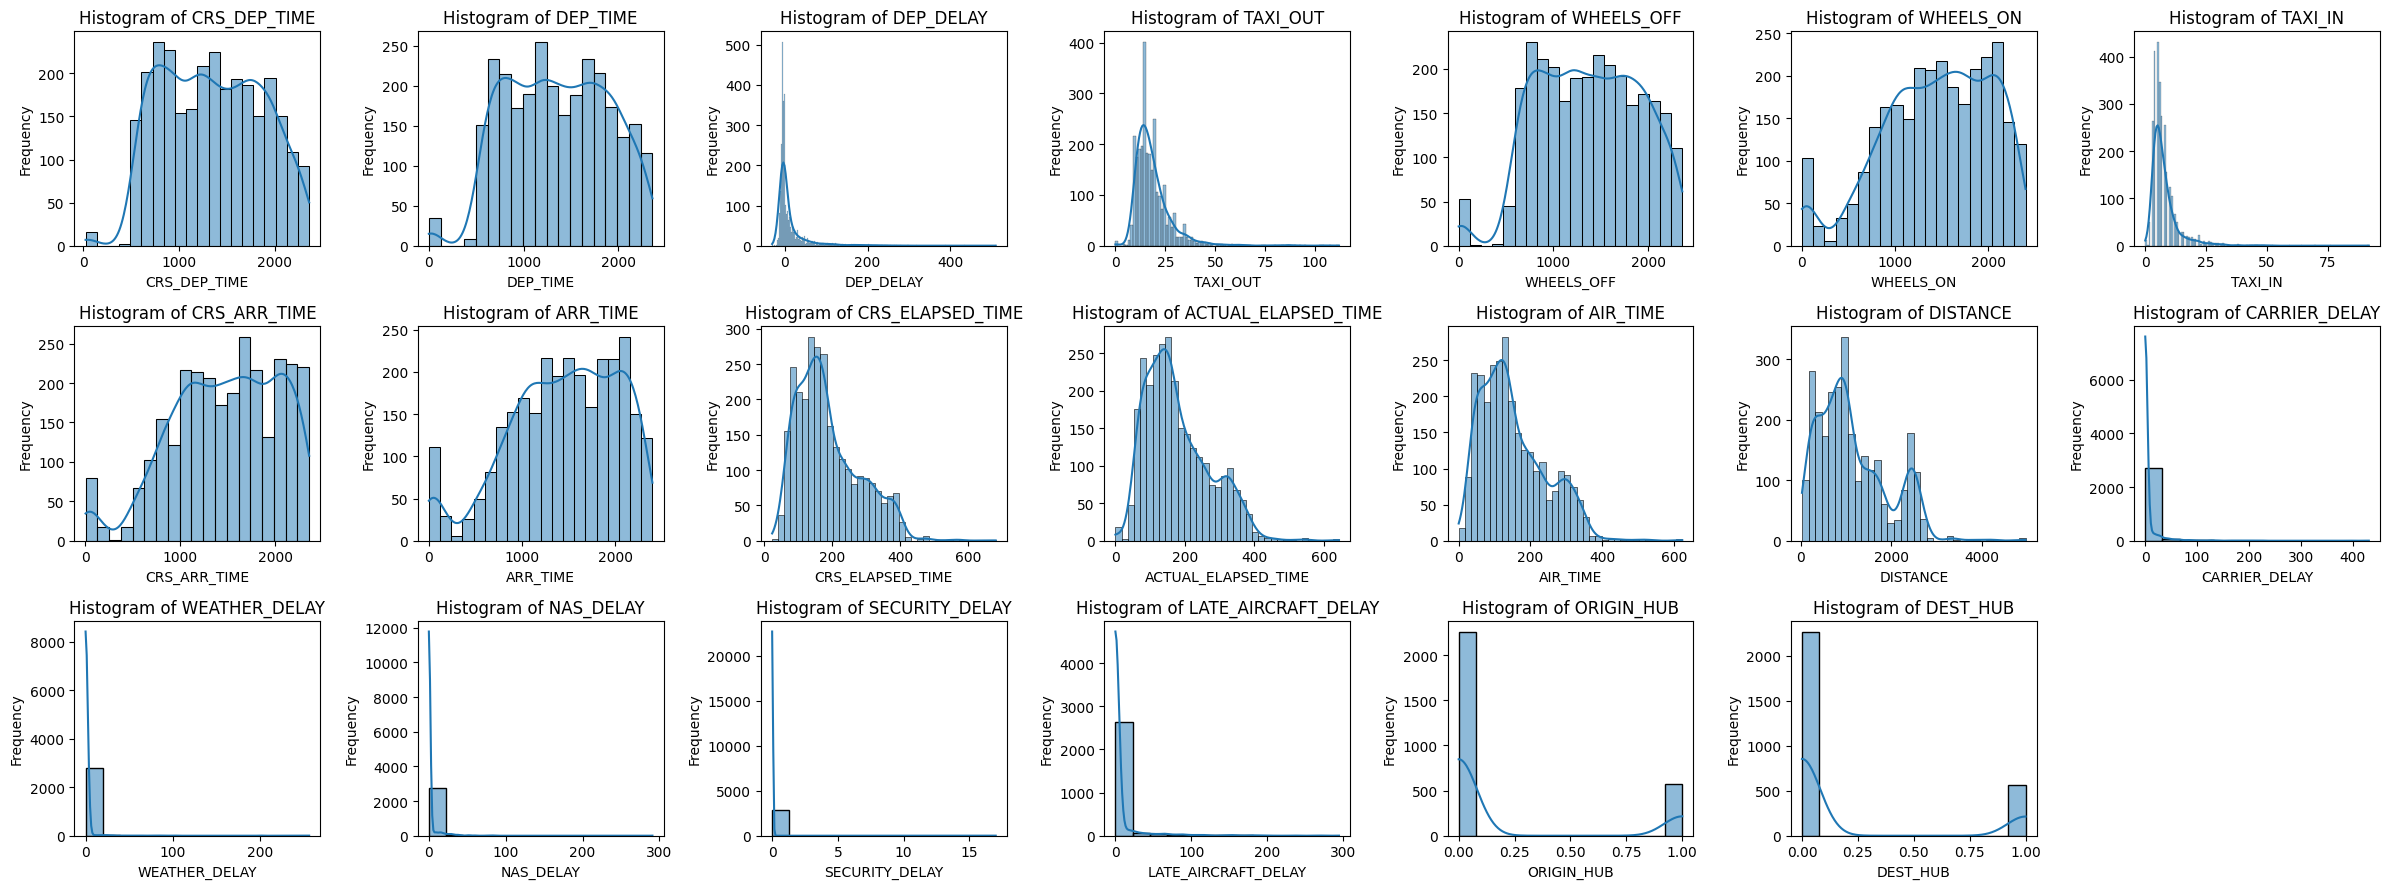

In [81]:
features_names = [f for f in x]  # List your features
n_features = len(features_names)

# Create a figure with subplots (3 rows, 7 columns)
fig, axes = plt.subplots(3, 7, figsize=(24, 9))  # Adjusted figsize for 3 rows and 7 columns

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(x):
    sns.histplot(x[feature], kde=True, ax=axes[i])  # Plot histogram with KDE
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty axes (if any)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Lets check **Variance homogeneity** : if the variances of the features are equal are not

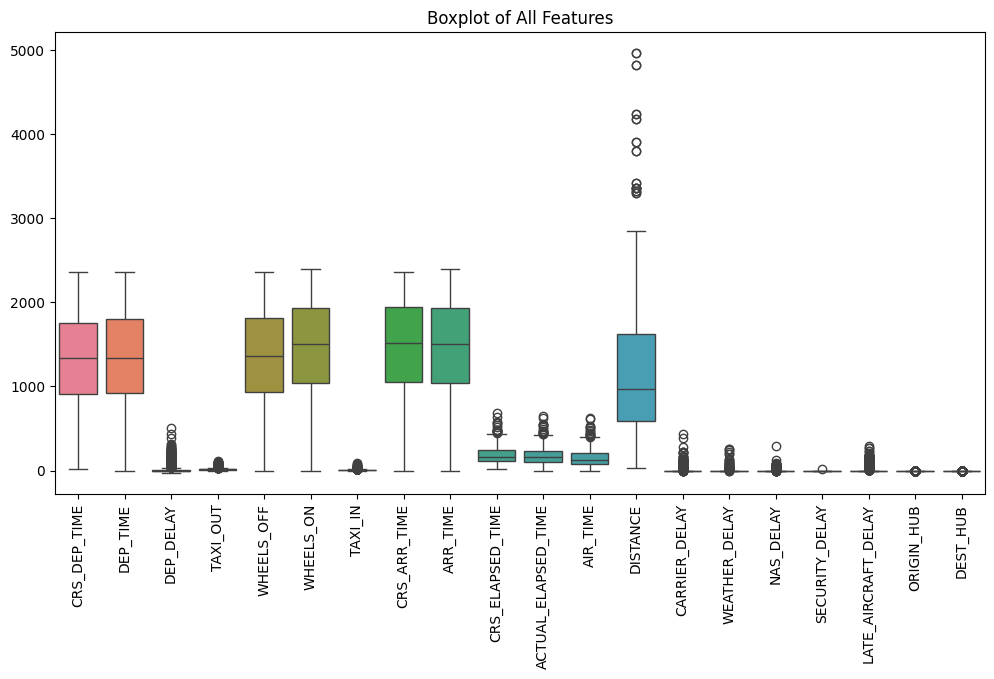

In [82]:
# Create a boxplot for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=x)
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()

In above diagram, features with similar boxplot structures (similar spread of values) have similar variances.

And Distance column contains outliers

In [83]:
Q1 = x['DISTANCE'].quantile(0.25)
Q3 = x['DISTANCE'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (filter rows that are within the bounds)
x_cleaned = x[(x['DISTANCE'] >= lower_bound) & (x['DISTANCE'] <= upper_bound)]

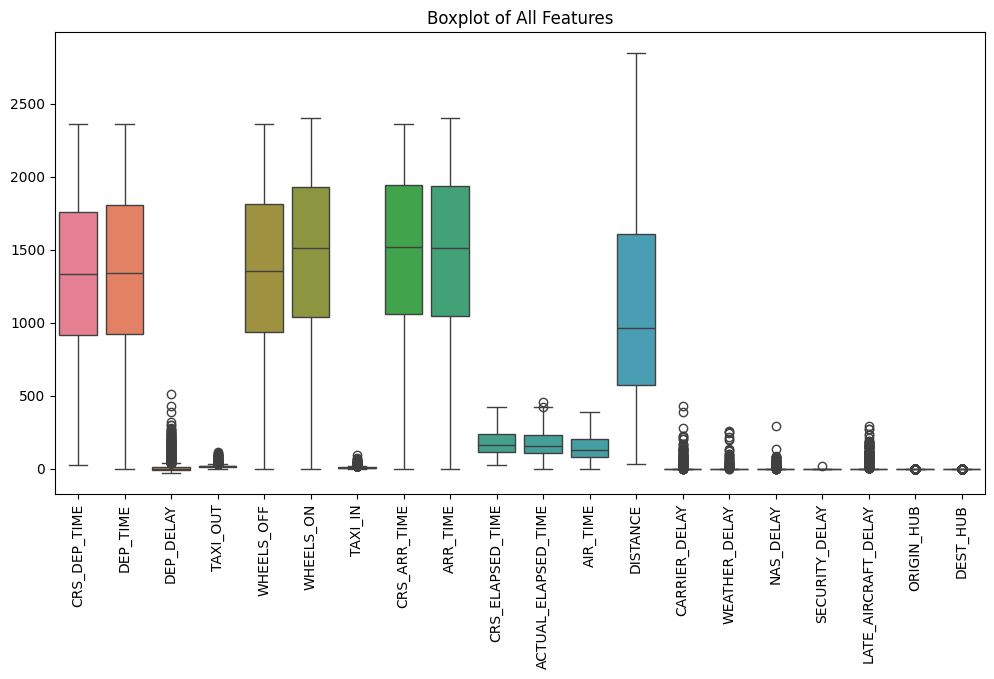

In [84]:
# Create a boxplot for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=x_cleaned)
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()

In [85]:
# Drop target
y = x_cleaned['CARRIER_DELAY']
X = x_cleaned.drop(['CARRIER_DELAY'], axis = 1)
X.shape, y.shape

((2814, 19), (2814,))

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2532, 19), (282, 19), (2532,), (282,))

In [87]:
y_train_class = y_train.apply(lambda x: 1 if x > 15 else 0)
y_test_class = y_test.apply(lambda x: 1 if x > 15 else 0)

In [88]:
print(y_train_class.value_counts())
print(y_test_class.value_counts())

CARRIER_DELAY
0    2316
1     216
Name: count, dtype: int64
CARRIER_DELAY
0    267
1     15
Name: count, dtype: int64


The dataset is imbalanced. So, we can use SMOTE for generates synthetic samples for the minority class or you can go without it and use ML-Algorithms with class weights

In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train_class)

In [24]:
X_resampled.shape, y_resampled.shape

((4632, 19), (4632,))

In [25]:
y_resampled.value_counts()

,count
CARRIER_DELAY,
0,2316
1,2316


Now, I am using imbalanced dataset and use class weights

In [89]:
from sklearn import linear_model, tree, neighbors, naive_bayes, ensemble, neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [90]:
rand = 42

In [91]:
# Classification
class_models = {
#Generalized Linear Models (GLMs)
'logistic':{'model': linear_model.LogisticRegression()},
'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1],\
class_weight='balanced')},
#Tree
'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
#Nearest Neighbors
'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)},
#Naive Bayes
'naive_bayes':{'model': naive_bayes.GaussianNB()},
#Ensemble Methods
'gradient_boosting':{'model':ensemble.GradientBoostingClassifier(n_estimators=210)},
'random_forest':{'model':ensemble.RandomForestClassifier(max_depth=11, class_weight='balanced', random_state=rand)},
#Neural Networks
'mlp':{'model':make_pipeline(StandardScaler(),neural_network.MLPClassifier(hidden_layer_sizes=(7,), max_iter=500,\
early_stopping=True, random_state=rand))}
}

In [92]:
for model_name in class_models.keys():
  fitted_model = class_models[model_name]['model'].fit(x_train, y_train_class)
  y_train_pred = fitted_model.predict(x_train.values)
  if model_name == 'ridge':
    y_test_pred = fitted_model.predict(x_test.values)
    y_test_pred = np.where(y_test_pred > 0.5, 1, 0)

  else:
    y_test_prob = fitted_model.predict_proba(x_test.values)[:,1]
    y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

  class_models[model_name]['fitted'] = fitted_model
  class_models[model_name]['probs'] = y_test_prob
  class_models[model_name]['preds'] = y_test_pred
  class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
  class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
  class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
  class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)

  if model_name != 'ridge':
    class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_prob)
  else:
    class_models[model_name]['ROC_AUC_test'] = 0

  class_models[model_name]['F1_test'] = metrics.f1_score(y_test_class, y_test_pred)
  class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)
  class_models[model_name]['confusion_matrix'] = confusion_matrix(y_test_class,y_test_pred)

In [93]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_test', 'MCC_test']]
class_metrics

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,ROC_AUC_test,F1_test,MCC_test
logistic,0.976698,0.968085,0.800926,0.666667,0.982522,0.689655,0.673299
ridge,0.930490,0.914894,0.814815,0.466667,0.000000,0.368421,0.333508
decision_tree,0.988547,0.950355,0.898148,0.533333,0.837953,0.533333,0.507116
knn,0.924961,0.929078,0.208333,0.000000,0.718477,0.000000,-0.031845
naive_bayes,0.874408,0.872340,0.555556,0.266667,0.735331,0.181818,0.127842
gradient_boosting,0.997235,0.968085,0.981481,0.666667,0.964045,0.689655,0.673299
random_forest,0.988942,0.946809,1.000000,0.466667,0.957803,0.482759,0.455057
mlp,0.906793,0.921986,0.134259,0.066667,0.575531,0.083333,0.046861


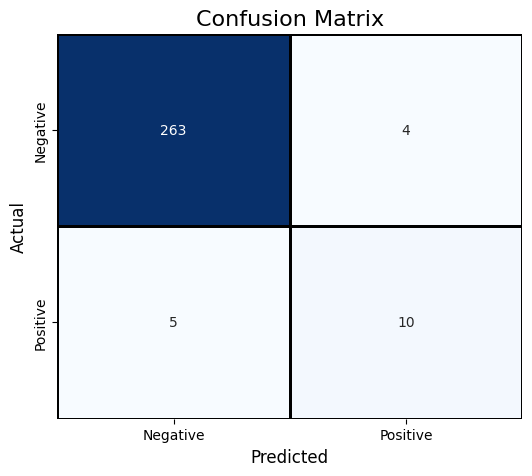

In [94]:
cm = class_models['logistic']['confusion_matrix']

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))  # Adjust size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            linewidths=1, linecolor='black')

# Customize the plot
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Display the plot
plt.show()

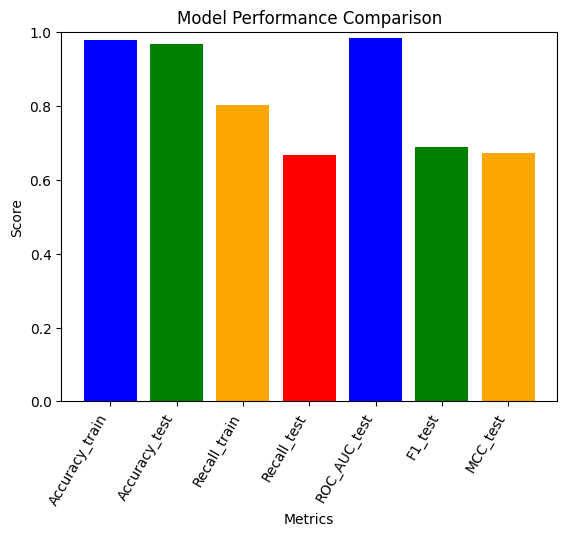

In [96]:
# Step 7: Create a bar chart to visualize the metrics
rf_metrics = dict(class_metrics.loc['logistic']).keys()
values = class_metrics.loc['logistic']

plt.bar(rf_metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.xlabel('Metrics')
plt.xticks(rotation=60, ha="right")
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.show()

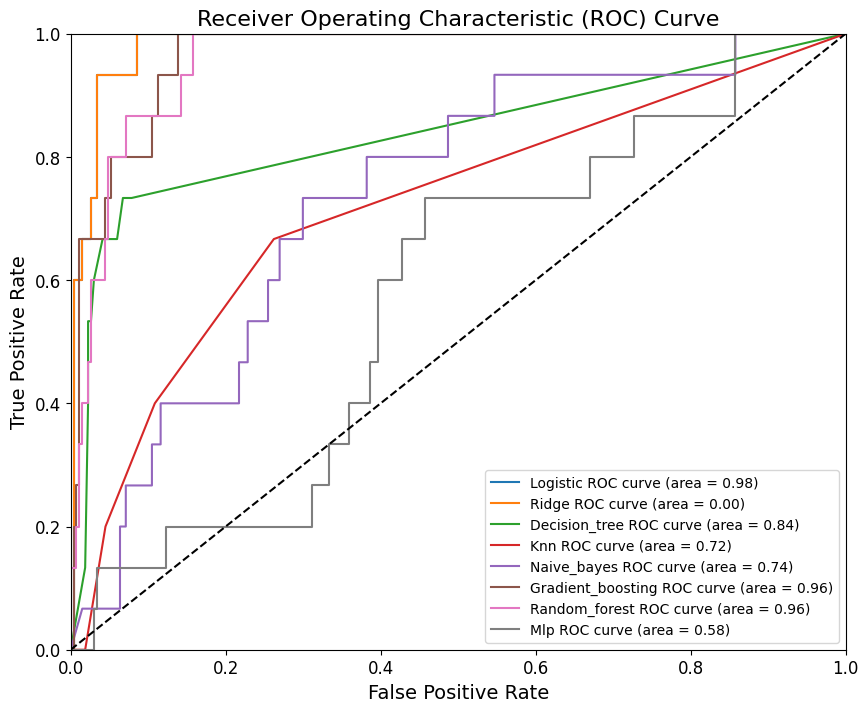

In [97]:
# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=12)

# Loop through each model to plot the ROC curve
for model_name, model_data in class_models.items():
    fpr, tpr, _ = metrics.roc_curve(y_test_class, model_data['probs'])
    plt.plot(fpr, tpr, label=f'{model_name.capitalize()} ROC curve (area = {model_data["ROC_AUC_test"]:0.2f})')

# Plot the diagonal (chance line)
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)

# Show the legend in the lower right corner
plt.legend(loc="lower right")

# Display the plot
plt.show()


In [98]:
coefs_lm = class_models['logistic']['fitted'].coef_
intercept_lm = class_models['logistic']['fitted'].intercept_

print("intercept_lm\n",intercept_lm)
print("coefs_lm\n",coefs_lm)

intercept_lm
 [-0.00503132]
coefs_lm
 [[-4.41111463e-04 -3.09693619e-04  2.01441260e-01 -2.69787548e-02
  -1.67839026e-04  1.25022359e-03 -9.59512574e-03 -2.59199759e-04
  -1.21911269e-03 -1.41913091e-01  5.12821746e-02  8.28911268e-02
   7.97086868e-04 -2.75805159e-01 -1.16676516e-02 -1.22374467e-03
  -2.03608267e-01 -2.29793643e-03 -1.33050050e-03]]


For easier understanding -> DataFrame with feature names and values

In [99]:
coef_df = pd.DataFrame({'feature': x_train.columns.values.tolist(), 'coef':coefs_lm[0]})
print("coef_df\n",coef_df)

coef_df
                 feature      coef
0          CRS_DEP_TIME -0.000441
1              DEP_TIME -0.000310
2             DEP_DELAY  0.201441
3              TAXI_OUT -0.026979
4            WHEELS_OFF -0.000168
5             WHEELS_ON  0.001250
6               TAXI_IN -0.009595
7          CRS_ARR_TIME -0.000259
8              ARR_TIME -0.001219
9      CRS_ELAPSED_TIME -0.141913
10  ACTUAL_ELAPSED_TIME  0.051282
11             AIR_TIME  0.082891
12             DISTANCE  0.000797
13        WEATHER_DELAY -0.275805
14            NAS_DELAY -0.011668
15       SECURITY_DELAY -0.001224
16  LATE_AIRCRAFT_DELAY -0.203608
17           ORIGIN_HUB -0.002298
18             DEST_HUB -0.001331


In [100]:
import statsmodels.api as sm

In [101]:
lgreg_mdl = sm.OLS(y_train_class, sm.add_constant(x_train)).fit()
print(lgreg_mdl.summary())

                            OLS Regression Results                            
Dep. Variable:          CARRIER_DELAY   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          4.58e-312
Time:                        00:46:13   Log-Likelihood:                 401.59
No. Observations:                2532   AIC:                            -763.2
Df Residuals:                    2512   BIC:                            -646.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0278    

**Feature Importance**

In [102]:
summary_df = lgreg_mdl.summary2().tables[1]
summary_df = summary_df.drop(['const']).reset_index().rename(columns={'index':'feature'})
summary_df['t_abs'] = abs(summary_df['t'])
sortedSummary = summary_df.sort_values(by=['t_abs'],ascending=False)
sortedSummary = sortedSummary[['feature','t_abs']]
print("Feature Importance Linear Regression\n",sortedSummary)

Feature Importance Linear Regression
                 feature      t_abs
2             DEP_DELAY  43.348877
16  LATE_AIRCRAFT_DELAY  27.163568
13        WEATHER_DELAY  20.161861
9      CRS_ELAPSED_TIME   5.192640
0          CRS_DEP_TIME   2.736894
8              ARR_TIME   2.678674
7          CRS_ARR_TIME   2.634742
1              DEP_TIME   2.565130
14            NAS_DELAY   1.931927
3              TAXI_OUT   1.481426
17           ORIGIN_HUB   1.427088
5             WHEELS_ON   1.417671
6               TAXI_IN   1.316225
11             AIR_TIME   1.258508
15       SECURITY_DELAY   1.208998
12             DISTANCE   1.044225
10  ACTUAL_ELAPSED_TIME   0.785134
4            WHEELS_OFF   0.539618
18             DEST_HUB   0.369928


##Interpreting Decision Tree

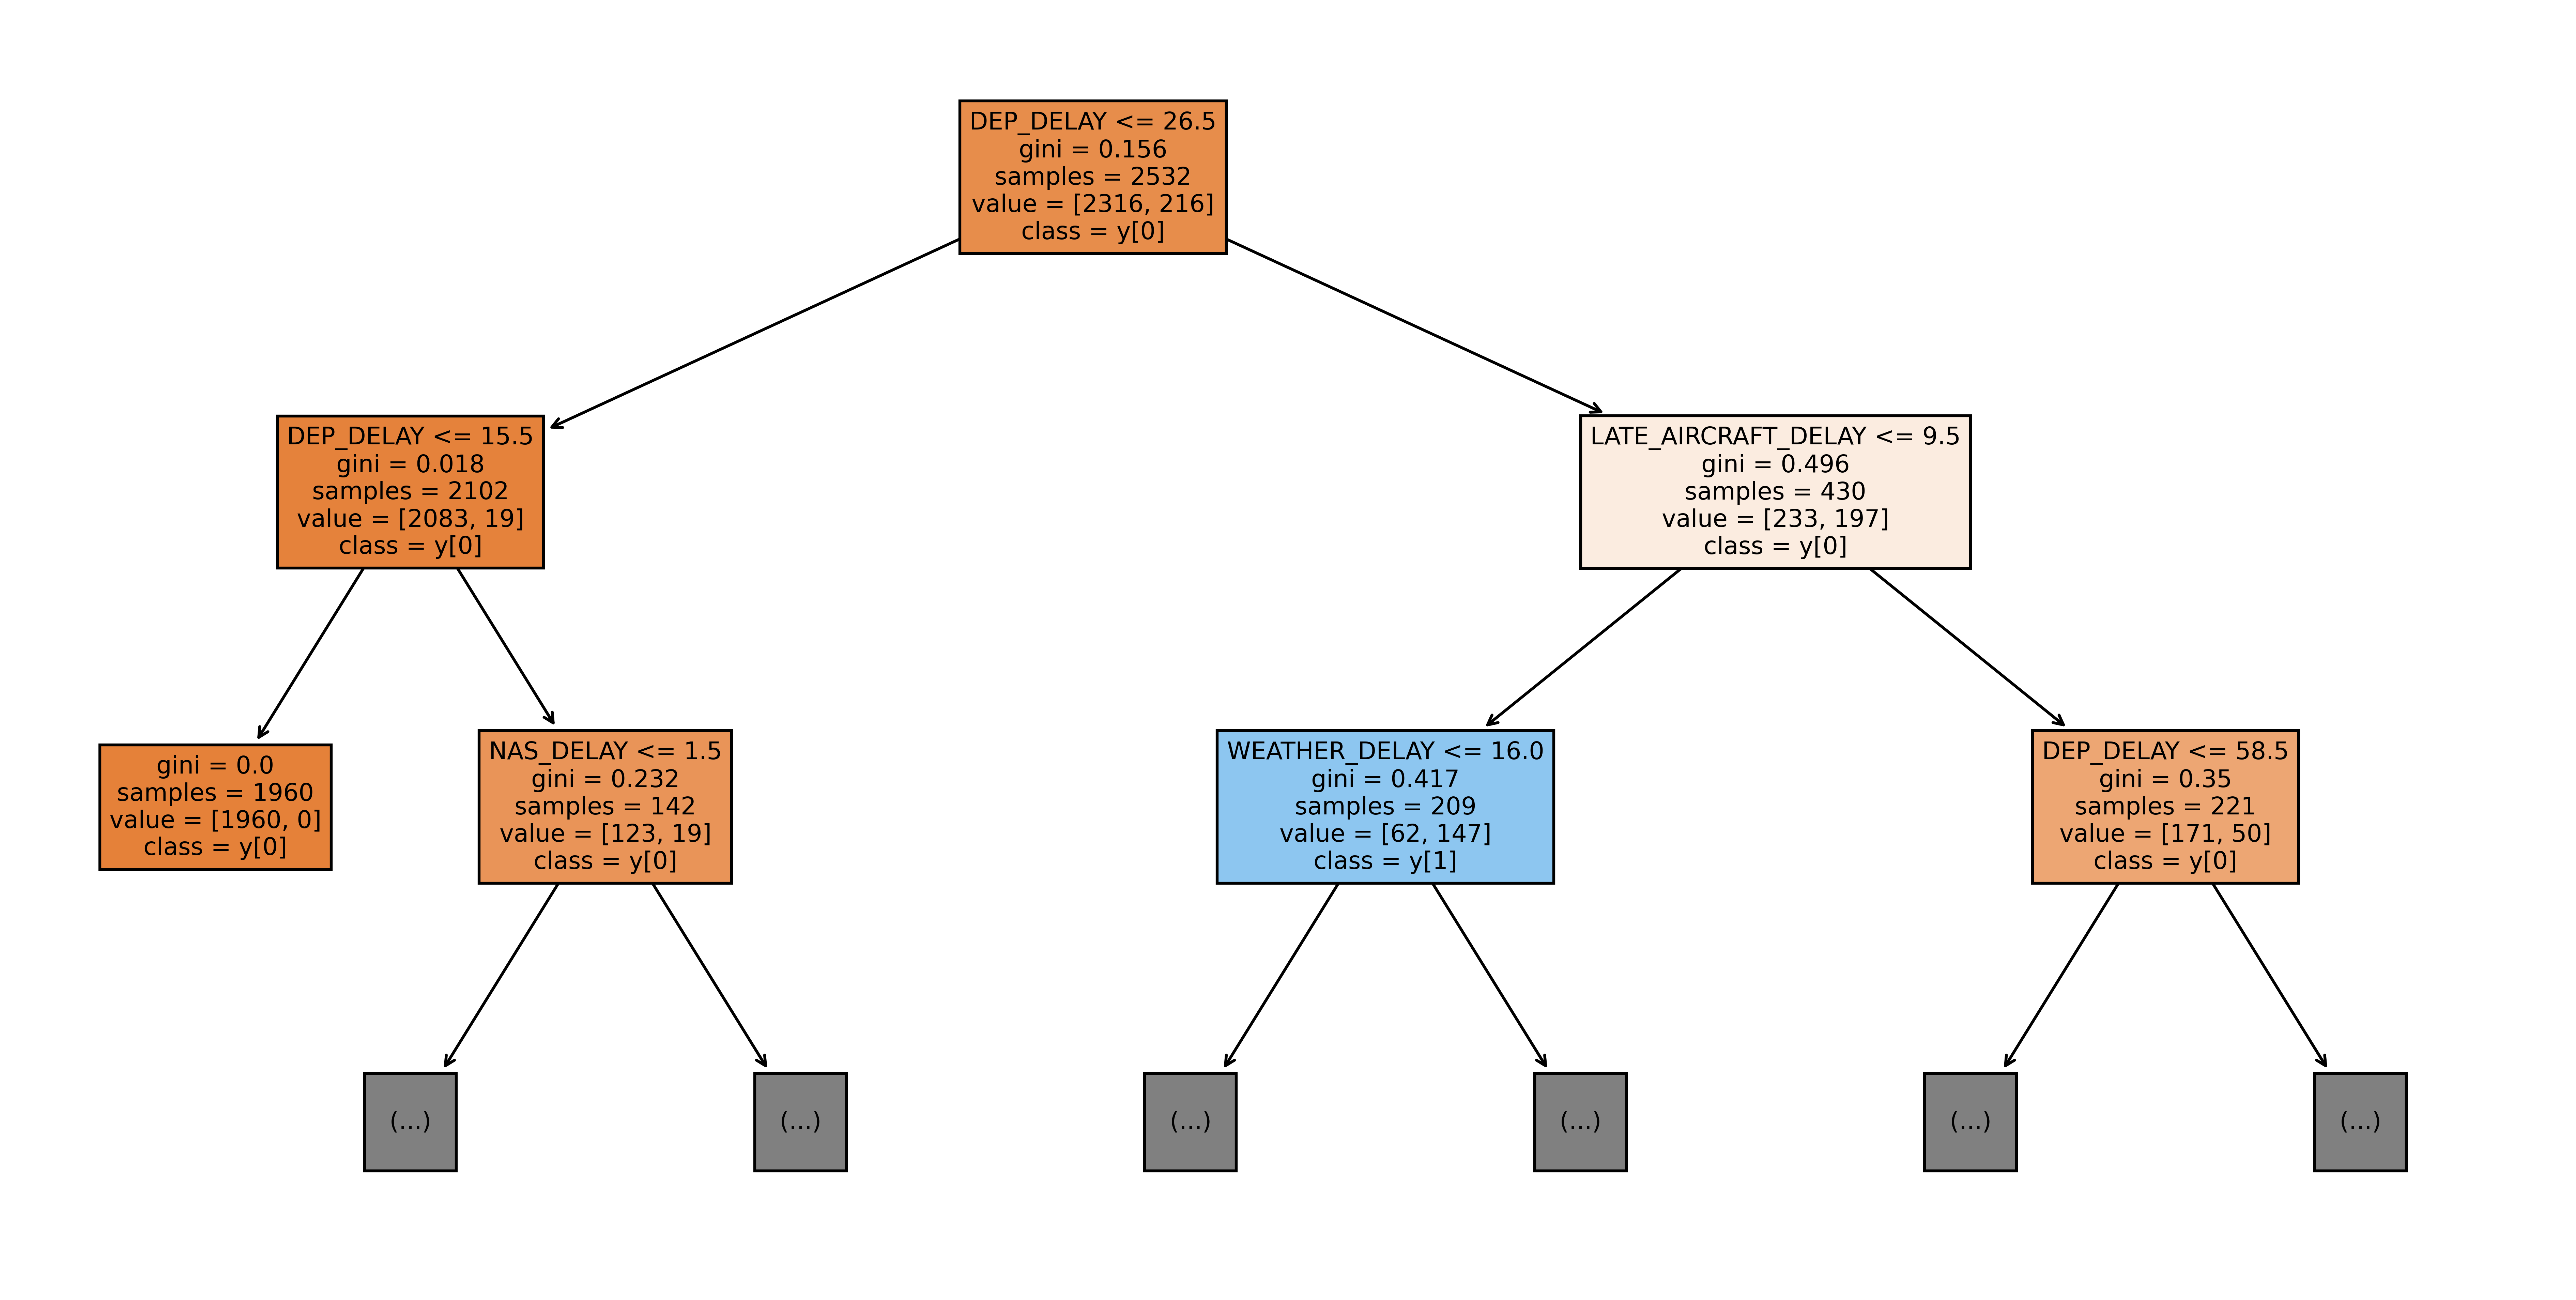

In [103]:
# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    class_models['decision_tree']['fitted'],
    feature_names=x_train.columns.values.tolist(),  # Feature names
    class_names=True,  # Optional: class names for classification tasks
    filled=True,       # Color the nodes based on class
    impurity=True,     # Show the Gini index
    max_depth=2        # Limit the depth of the tree visualization
)

# Display the plot
plt.show()

Feature Importance using decision tree

In [104]:
dt_imp_df = pd.DataFrame({'feature': x_train.columns.values.tolist(), 'importance':class_models['decision_tree']['fitted'].feature_importances_}).sort_values(by=['importance'],ascending=False)
print("Feature Importance Decision Tree\n",dt_imp_df)

Feature Importance Decision Tree
                 feature  importance
2             DEP_DELAY    0.497750
16  LATE_AIRCRAFT_DELAY    0.226571
14            NAS_DELAY    0.077736
13        WEATHER_DELAY    0.072099
3              TAXI_OUT    0.024949
9      CRS_ELAPSED_TIME    0.024209
6               TAXI_IN    0.019800
12             DISTANCE    0.017453
4            WHEELS_OFF    0.011118
8              ARR_TIME    0.009071
1              DEP_TIME    0.008801
0          CRS_DEP_TIME    0.006638
5             WHEELS_ON    0.003803
11             AIR_TIME    0.000000
10  ACTUAL_ELAPSED_TIME    0.000000
7          CRS_ARR_TIME    0.000000
15       SECURITY_DELAY    0.000000
17           ORIGIN_HUB    0.000000
18             DEST_HUB    0.000000


##Global Interpretation with Explainable Boosting Machine Classifier

In [ ]:
!pip install interpret

In [105]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [106]:
ebm_model = ExplainableBoostingClassifier()
ebm_model.fit(x_train, y_train_class)

ExplainableBoostingClassifier()

In [107]:
show(ebm_model.explain_global())

**Local Interpretation**

In [108]:
ebm_lcl = ebm_model.explain_local(x_test.iloc[77:78], y_test_class.iloc[77:78], name = 'EBM')
show(ebm_lcl)

The above figure shows how much each
term is
contributed to
the prediction for
a single sample and feature interactions

#Skoped Rules

In [49]:
!pip uninstall scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install scikit-learn==1.1.3
!pip install skope-rules
!pip install --upgrade setuptools wheel

In [38]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [39]:
import collections.abc
collections.Iterable = collections.abc.Iterable
from skrules import SkopeRules

In [41]:
sr_rule = SkopeRules(n_estimators=200, precision_min=0.2, recall_min=0.01, n_jobs = -1, random_state=rand,
                     feature_names=x_train, max_depth=7)

sr_rule.fit(x_train, y_train_class)

SkopeRules(feature_names=      CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  \
1894          1853    1848.0       -5.0      11.0      1859.0     2059.0   
1586           715     719.0        4.0      18.0       737.0     1008.0   
2445          1600    1718.0       78.0      32.0      1750.0     1856.0   
1072          1415    1415.0        0.0      10.0      1425.0     2118.0   
2676          2200    2218.0       18.0      16.0      2234.0      114.0   
...            ...       ...        ...       ...         ...        ...   
2126          1759    1808.0        9.0      13.0      1821.0     1907.0   
505            940     940.0        0.0      17.0       957.0     1115.0   
2708          1756    1754.0       -2.0       9.0...
...        ...       ...            ...        ...             ...   
2126      46.0     292.0            0.0        0.0             0.0   
505      198.0    1346.0            0.0        0.0             0.0   
2708     130.0     965.0            0.0        0.0             0.0   
348      139.0    1005.0            0.0        0.0             0.0   
382      149.0    1062.0            0.0        0.0             0.0   

      LATE_AIRCRAFT_DELAY  ORIGIN_HUB  DEST_HUB  
1894                  0.0           0         0  
1586                  0.0           1         0  
2445                 64.0           0         1  
1072                  0.0           0         0  
2676                  0.0           0         0  
...                   ...         ...       ...  
2126                  0.0           0         1  
505                   0.0           0         0  
2708                  0.0           0         0  
348                   0.0           0         1  
382                   0.0           0         0  

[2532 rows x 19 columns],
           max_depth=7, n_estimators=200, n_jobs=-1, precision_min=0.2,
           random_state=42)

In [48]:
import textwrap

print("\nFirst 3 Rules for the Prediction:\n" + "-"*50)

for i, rule in enumerate(sr_rule.rules_[:3], start=1):
    wrapped_rule = textwrap.fill(str(rule), width=80)  # Wrap rule text at 80 characters
    print(f"Rule {i}:\n{wrapped_rule}\n" + "-"*50)



First 3 Rules for the Prediction:
--------------------------------------------------
Rule 1:
('WEATHER_DELAY <= 16.0 and NAS_DELAY <= 55.5 and LATE_AIRCRAFT_DELAY <= 9.5 and
DEP_DELAY > 34.5 and ARR_TIME > 5.5 and CRS_ELAPSED_TIME <= 407.5',
(0.9313725490196079, 0.5459770114942529, 2))
--------------------------------------------------
Rule 2:
('ACTUAL_ELAPSED_TIME > 26.0 and WEATHER_DELAY <= 17.5 and NAS_DELAY <= 55.5 and
LATE_AIRCRAFT_DELAY <= 9.5 and DEP_DELAY > 36.5 and CRS_ELAPSED_TIME <= 407.5',
(0.9578947368421052, 0.5321637426900585, 2))
--------------------------------------------------
Rule 3:
('DISTANCE > 68.5 and WEATHER_DELAY <= 16.0 and NAS_DELAY <= 55.5 and
LATE_AIRCRAFT_DELAY <= 9.5 and DEP_DELAY > 38.0 and CRS_ELAPSED_TIME <= 407.5',
(0.9468085106382979, 0.5297619047619048, 2))
--------------------------------------------------
